# Section 7: Monte Carlo

Monte Carlo simulation is a useful tool for estimating the probability distribution of complex outcomes that rely on random variables. We can estimate these random variables if we know information about their distributions. From these estimations we can repeatedly evaluate our outcome to get a distribution over the likelihood of all possible outcomes.


For example assume that we have a function $f(X,Y)$ that depends on two random variables $X$ and $Y$. Now assume that $X \sim D_x$ and $Y \sim D_y$. We can sample two random points $x$ and $y$ from these distributions in order to estimate the expected value of $f$ by $\mathbb{E}f(X,Y) = f(x,y)$. 
 
However this is unlikely to be a good estimate since we only used a single random sample. Now assume we draw $N$ samples $(x_1,\dots,x_N)$ and $(y_1,\dots,y_N)$. The law of large numbers will allow us to get an improved estimate as we increase $N$.

 $$ \mathbb{E}f(X,Y) = \underset{N\to \infty}{lim} \frac{1}{N} \sum_{i=1}^{N} f(x_i,y_i)$$

Drawing a large $N$ number of samples also allows us to approximate the probability distribution over the outcomes of $f$.

# Example 1: Sum of Random Dice

For an introductory example we will estimate the probability distribution and expected value of summing two randomly rolled standard dice. This problem can be solved relatively easy by hand if we were to write out each of the 36 possible combinations, where we would get the following distribtuion:



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = np.array([[2,1/36],[3,2/36],[4,3/36],[5,4/36],[6,5/36],[7,6/36],[8,5/36],[9,4/36],[10,3/36],[11,2/36],[12,1/36]])
print(f"Expected value of two-dice sum: {np.sum(np.prod(data,axis=1))}")
pd.DataFrame(data, columns=["Sum", "Probability"])


Expected value of two-dice sum: 6.999999999999998


,Sum,Probability
0,2.0,0.027778
1,3.0,0.055556
2,4.0,0.083333
3,5.0,0.111111
4,6.0,0.138889
5,7.0,0.166667
6,8.0,0.138889
7,9.0,0.111111
8,10.0,0.083333
9,11.0,0.055556


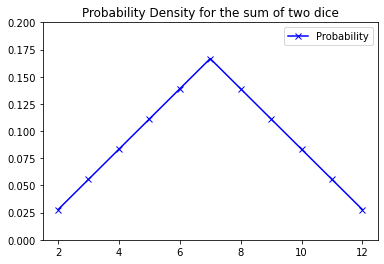

In [ ]:
plt.plot(data[:,0],data[:,1],'b-x')
plt.legend(["Probability"])
plt.ylim([0,0.2])
plt.title("Probability Density for the sum of two dice")
plt.show()

Now we can estimate this distribution with a Monte Carlo simulation. How can we model this as a monte carlo simulation. Here are some questions to think about:

1. What are our random variables $X$ and $Y$?
2. What distributions are $X$ and $Y$ sampled from?
3. What is the function $f$ we are trying to estimate and how does it relate to $X$ and $Y$?

Once we've answered these questions we can begin implementing the template function below diceSumMonteCarlo().

In [ ]:
# N is a hyperparameter that denotes how many iterations the simulation runs

# This function should run a monte carlo estimation of the sum of two dice over N iterations and store
# the result of each iteration into 'results'
def diceSumMonteCarlo(N=1000):

  # Numpy Implementation
  '''
  rolls = np.random.randint(1,7,size=(2,N))
  results = np.sum(rolls,axis=0)
  return results
  '''

  # Loop Implementation
  results = []
  for i in range(N):
    d1 = np.random.randint(1,7)
    d2 = np.random.randint(1,7)
    results.append(d1 + d2)

  return np.array(results)


Estimated Expected Value of 2-Dice Sum: 6.85


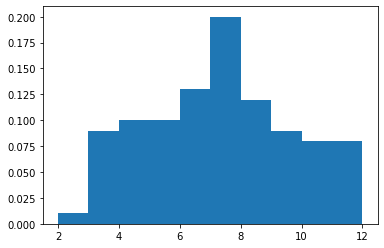

Estimated Expected Value of 2-Dice Sum: 6.996


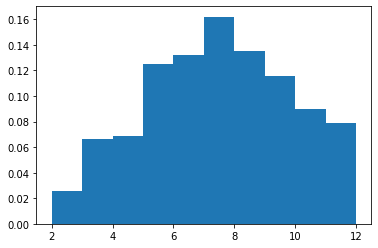

Estimated Expected Value of 2-Dice Sum: 7.00416


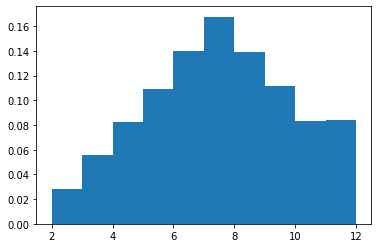

In [ ]:
dist = diceSumMonteCarlo(100)
print(f"Estimated Expected Value of 2-Dice Sum: {np.mean(dist)}")
plt.hist(dist,density=True)
plt.show()

dist = diceSumMonteCarlo(1000)
print(f"Estimated Expected Value of 2-Dice Sum: {np.mean(dist)}")
plt.hist(dist,density=True)
plt.show()

dist = diceSumMonteCarlo(100000)
print(f"Estimated Expected Value of 2-Dice Sum: {np.mean(dist)}")
plt.hist(dist,density=True)
plt.show()



# Example 2: Sum of Multiple Random Dice

For a second intro example lets look at taking the sum of an arbitrary number of identical dice. Let $d$ denote the number of dice. Before implementing we can ask ourselves similiar questions to the previous problem:

1. What are our random variables and how will we represent them?
2. What distributions are our random variables drawn from?
3. What is the function $f$ we are trying to estimate and how does it relate to our random variables?

After addressing these we can implement a monte carlo simulation to the function MultiDiceSum()

In [ ]:
# d is the number of dice
# N is the number of simulation iterations

# This function should return a numpy array 'results' that has N entries,
# where each entry is the outcome of a single iteration

def MultiDiceSum(d=2,N=1000):

  # Numpy Implementation
  '''
  rolls = np.random.randint(1,7,size=(d,N))
  results = np.sum(rolls,axis=0)
  return results
  '''

  # Loop Implementation
  results = []
  for i in range(N):
    sum = 0
    for die in range(d):
      sum += np.random.randint(1,7)
    results.append(sum)

  return np.array(results)

Estimated Expected Value of 3-Dice Sum: 10.504


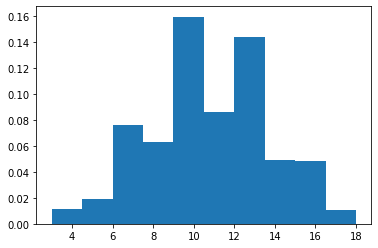

Estimated Expected Value of 10-Dice Sum: 34.9627


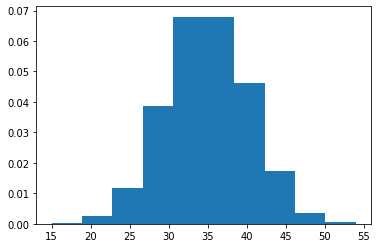

Estimated Expected Value of 10-Dice Sum: 350.0873


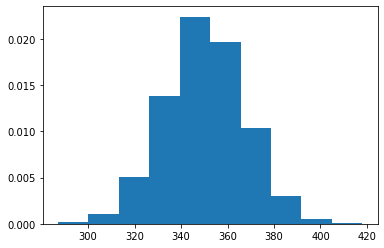

In [ ]:
dist = MultiDiceSum(d=3,N=10000)
print(f"Estimated Expected Value of 3-Dice Sum: {np.mean(dist)}")
plt.hist(dist,density=True)
plt.show()

dist = MultiDiceSum(d=10,N=10000)
print(f"Estimated Expected Value of 10-Dice Sum: {np.mean(dist)}")
plt.hist(dist,density=True)
plt.show()

dist = MultiDiceSum(d=100,N=10000)
print(f"Estimated Expected Value of 10-Dice Sum: {np.mean(dist)}")
plt.hist(dist,density=True)
plt.show()

# Example 3: Monte Carlo Integration

Assume we have a function $h(x)$ on the real numbers we are trying to integrate between two points $a$ and $b$. We can approximate this in many ways like Riemann sums with multiple points. What if we try to approximate this integral using only a single point $x^*$ at a time (between $a$ and $b$). We can do this geometrically by remembering that the integral measures the area under the curve, so we can approximate it with a rectangle of height $h(x^*)$ and width $b-a$.

$$ \int_a^b h(x) dx \approx (b-a) h(x^*)$$

Again this measure is likely to be a poor estimate of the true integral, but we can improve the estimate by randomly sampling many values $x^*$.

$$ \int_a^b h(x) dx = \underset{N \to \infty}{lim}  \frac{b-a}{N} \sum_{i=1}^N h(x_i)$$

Again lets consider the three important questions mentioned earlier:

1. What are our random variables and how will we represent them?
2. What distributions are our random variables drawn from?
3. What is the function $f$ we are trying to estimate and how does it relate to our random variables?

Lets implement this into a function together monteCarloIntegrate()

In [ ]:
# f is a numerical function that is passed in 
# a is the left endpoint
# b is the right endpoint
# N is the number of iterations

# This function will return an np array 'results' that stores the estimated
# integral at each iteration
def monteCarloIntegrate(f,a,b,N):

  # Numpy implementation
  '''
  x = np.random.uniform(a,b,N)
  results = (b - a) * f(x)
  return results
  '''

  # Loop implementation
  results = []
  for i in range(N):
    x = np.random.uniform(a,b)
    results.append((b - a) * f(x))

  return np.array(results)





Now lets test our implentation on a few functions:

$$ \int_0^2 4x^3 dx $$

$$ \int_0^{2\pi} x sin x dx $$



In [ ]:
def f1(x):
  return 4 * np.power(x,3)
def g1(a,b):
  return np.power(b,4) - np.power(a,4)

def f2(x):
  return x * np.sin(x)
def g2(a,b):
  return np.sin(b) - np.sin(a) + a * np.cos(a) - b * np.cos(b)


In [ ]:
ex1 = monteCarloIntegrate(f1,0,2,100000)
print(f"Estimate: {np.mean(ex1)}")
print(f"Difference from true value: {np.mean(ex1) - g1(0,2)}")


ex2 = monteCarloIntegrate(f2,0,2 * np.pi,10000)
print(f"Estimate: {np.mean(ex2)}")
print(f"Difference from true value: {np.mean(ex2) - g2(0,2 * np.pi)}")



Estimate: 16.051238979224532
Difference from true value: 0.051238979224532244
Estimate: -5.976897521573837
Difference from true value: 0.30628778560574954


Lastly, lets look at the probability distributions of our outcomes. How do they compare to the outcome distributions we saw from the dice rolling examples:



Example 1:


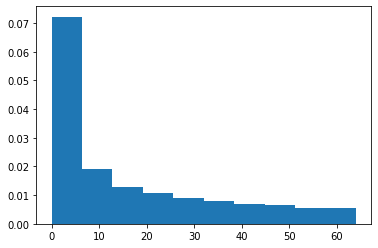

Example 2:


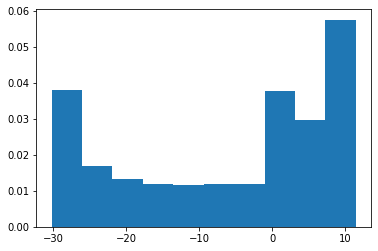

In [ ]:
print("Example 1:")
plt.hist(ex1,density=True)
plt.show()

print("Example 2:")
plt.hist(ex2,density=True)
plt.show()